Ofelia Gabriela Góngora Méndez - A01666131


Helena Eridani Escandon Lopez - A01659511


Armando Atanasio Navarrete Yepez - A01658529

#  Part 1: Data Exploration and Suitability

##  1.1 Basic Data Exploration


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import os
from factor_analyzer import FactorAnalyzer
from sklearn.impute import SimpleImputer

data_fp = '..\data\customer_satisfaction_data.csv'

df = pd.read_csv(data_fp, encoding='utf-8')
print('Dataset shape:', df.shape)

# Vista preliminar
print("🔹 Primeras 5 filas del dataset:")
display(df.head())

# Tipos de datos
print("\n🔹 Tipos de datos por columna:")
display(df.dtypes)

# Variables esperadas de satisfacción
satisfaction_items = [
    'technical_expertise','problem_solving','innovation_solutions','technical_documentation','system_integration',
    'account_manager_responsive','executive_access','trust_reliability','long_term_partnership','communication_clarity',
    'project_management','timeline_adherence','budget_control','quality_deliverables','change_management',
    'cost_transparency','value_for_money','roi_demonstration','competitive_pricing','billing_accuracy',
    'support_responsiveness','training_quality','documentation_help'
]

# Variables outcome
outcomes = ['overall_satisfaction','nps_score','renewal_likelihood','revenue_growth_pct','referrals_generated']

# Verificar presencia de columnas
missing_items = [c for c in satisfaction_items if c not in df.columns]
missing_outcomes = [c for c in outcomes if c not in df.columns]

if missing_items:
    print(f"Faltan {len(missing_items)} variables de satisfacción:", missing_items)
else:
    print("Todas las variables de satisfacción están presentes.")

if missing_outcomes:
    print(f"Faltan {len(missing_outcomes)} variables outcome:", missing_outcomes)
else:
    print("Todas las variables outcome están presentes.")

# Mostrar valores únicos y rangos para variables clave
print("\n Valores únicos (muestra de columnas representativas):")
for col in ['quarter','overall_satisfaction','nps_score','renewal_likelihood']:
    if col in df.columns:
        print(f"{col}: {df[col].nunique()} valores únicos ->", df[col].unique()[:10])

# Distribución de escalas (valores mínimos y máximos)
print("\n Rango de valores en variables de satisfacción:")
ranges = df[satisfaction_items].agg(['min','max'])
display(ranges.T.head(10))

# Conteo de valores nulos
print("\n Porcentaje de datos faltantes por variable (top 10):")
na_pct = df.isna().mean().sort_values(ascending=False) * 100
display(na_pct.head(10).to_frame('pct_missing'))

# Información general de columnas numéricas
print("\n Resumen estadístico general (numérico):")
display(df.describe().T.head(10))

print("\n Revisión estructural completa — datos listos para EDA.")

Dataset shape: (3400, 31)
🔹 Primeras 5 filas del dataset:


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\erida\AppData\Local\Temp\ipykernel_17020\247994810.py:13: SyntaxWarning: invalid escape sequence '\d'
  data_fp = '..\data\customer_satisfaction_data.csv'


,customer_id,quarter,survey_date,account_manager_responsive,billing_accuracy,budget_control,change_management,communication_clarity,competitive_pricing,cost_transparency,...,technical_expertise,timeline_adherence,training_quality,trust_reliability,value_for_money,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
0,CUST_001,Q1_2024,2024-03-22,5.0,6.0,4.0,5.0,4.0,5.0,5.0,...,4.0,4.0,2.0,6.0,6.0,4,6,4,12.3,1
1,CUST_002,Q1_2024,2024-03-20,5.0,3.0,4.0,5.0,5.0,3.0,3.0,...,4.0,4.0,4.0,4.0,4.0,4,5,3,17.8,0
2,CUST_003,Q1_2024,2024-03-17,4.0,3.0,4.0,3.0,4.0,4.0,3.0,...,4.0,4.0,3.0,4.0,3.0,3,4,3,-7.8,0
3,CUST_004,Q1_2024,2024-03-08,3.0,4.0,4.0,3.0,2.0,3.0,4.0,...,4.0,4.0,4.0,2.0,4.0,4,5,2,-13.4,0
4,CUST_005,Q1_2024,2024-03-12,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,6.0,5.0,4.0,5.0,4.0,5,5,4,3.7,2



🔹 Tipos de datos por columna:


customer_id                    object
quarter                        object
survey_date                    object
account_manager_responsive    float64
billing_accuracy              float64
budget_control                float64
change_management             float64
communication_clarity         float64
competitive_pricing           float64
cost_transparency             float64
documentation_help            float64
executive_access              float64
innovation_solutions          float64
long_term_partnership         float64
problem_solving               float64
project_management            float64
quality_deliverables          float64
roi_demonstration             float64
support_responsiveness        float64
system_integration            float64
technical_documentation       float64
technical_expertise           float64
timeline_adherence            float64
training_quality              float64
trust_reliability             float64
value_for_money               float64
overall_sati

Todas las variables de satisfacción están presentes.
Todas las variables outcome están presentes.

 Valores únicos (muestra de columnas representativas):
quarter: 4 valores únicos -> ['Q1_2024' 'Q2_2024' 'Q3_2024' 'Q4_2024']
overall_satisfaction: 7 valores únicos -> [4 3 5 6 2 7 1]
nps_score: 11 valores únicos -> [ 6  5  4  7  8  1  3 10  2  9]
renewal_likelihood: 5 valores únicos -> [4 3 2 1 5]

 Rango de valores en variables de satisfacción:


,min,max
technical_expertise,1.0,7.0
problem_solving,1.0,7.0
innovation_solutions,1.0,7.0
technical_documentation,1.0,7.0
system_integration,1.0,7.0
account_manager_responsive,1.0,7.0
executive_access,1.0,7.0
trust_reliability,1.0,7.0
long_term_partnership,1.0,7.0
communication_clarity,1.0,7.0



 Porcentaje de datos faltantes por variable (top 10):


,pct_missing
trust_reliability,0.647059
problem_solving,0.588235
technical_documentation,0.558824
project_management,0.500000
support_responsiveness,0.500000
budget_control,0.500000
training_quality,0.500000
roi_demonstration,0.500000
account_manager_responsive,0.470588
communication_clarity,0.470588



 Resumen estadístico general (numérico):


,count,mean,std,min,25%,50%,75%,max
account_manager_responsive,3384.0,4.115248,0.970303,1.0,3.0,4.0,5.0,7.0
billing_accuracy,3387.0,4.101270,0.962109,1.0,3.0,4.0,5.0,7.0
budget_control,3383.0,4.100798,0.983397,1.0,3.0,4.0,5.0,7.0
change_management,3388.0,4.109504,0.977813,1.0,3.0,4.0,5.0,7.0
communication_clarity,3384.0,4.092494,0.964956,1.0,3.0,4.0,5.0,7.0
competitive_pricing,3385.0,4.079468,0.979341,1.0,3.0,4.0,5.0,7.0
cost_transparency,3390.0,4.100885,0.981008,1.0,3.0,4.0,5.0,7.0
documentation_help,3386.0,4.079445,0.979800,1.0,3.0,4.0,5.0,7.0
executive_access,3390.0,4.113569,0.969478,1.0,4.0,4.0,5.0,7.0
innovation_solutions,3390.0,4.105310,0.985496,1.0,3.0,4.0,5.0,7.0



 Revisión estructural completa — datos listos para EDA.


We worked with N=3,400 rows and 31 columns. The satisfaction variables are on a 1–7 scale and we have the outcomes: overall_satisfaction, nps_score, renewal_likelihood, as well as revenue_growth_pct and referrals_generated. With this structure we can use correlations and, afterwards, factor analysis.

The satisfaction columns are numeric (Likert 1–7). overall_satisfaction uses 1–7, nps_score 1–10, and renewal_likelihood 1–5. quarter includes Q1–Q4 2024. The scales are consistent.

We identified that the % of NA per variable is <1%. There are no unusual patterns; the impact on the analysis is minimal.

Note: the table with high percentages (0.64, 0.58, …) corresponds to an intermediate calculation with a different denominator. For the analysis we take the final metric: NA <1% per column.

Lastly, the means are around 4.1/7, with a standard deviation of 1.0 and quartiles 3–5. Quick read: lukewarm-positive satisfaction and sufficient variation to separate factors.

Descriptivos (primeras filas):


,count,mean,std,min,25%,50%,75%,max
technical_expertise,3391.0,4.115305,0.974591,1.0,4.0,4.0,5.0,7.0
problem_solving,3380.0,4.110651,0.991025,1.0,3.0,4.0,5.0,7.0
innovation_solutions,3390.0,4.105310,0.985496,1.0,3.0,4.0,5.0,7.0
technical_documentation,3381.0,4.117421,0.983952,1.0,3.0,4.0,5.0,7.0
system_integration,3386.0,4.113408,1.005223,1.0,3.0,4.0,5.0,7.0



Porcentaje de NA por variable:


trust_reliability             0.006471
problem_solving               0.005882
technical_documentation       0.005588
roi_demonstration             0.005000
budget_control                0.005000
project_management            0.005000
support_responsiveness        0.005000
training_quality              0.005000
account_manager_responsive    0.004706
communication_clarity         0.004706
value_for_money               0.004412
competitive_pricing           0.004412
documentation_help            0.004118
long_term_partnership         0.004118
system_integration            0.004118
billing_accuracy              0.003824
quality_deliverables          0.003824
change_management             0.003529
innovation_solutions          0.002941
cost_transparency             0.002941
executive_access              0.002941
technical_expertise           0.002647
timeline_adherence            0.002353
dtype: float64

C:\Users\erida\AppData\Local\Temp\ipykernel_17020\2150629328.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dim_means.index, y=dim_means.values, ax=axes[0], palette="Blues_r")


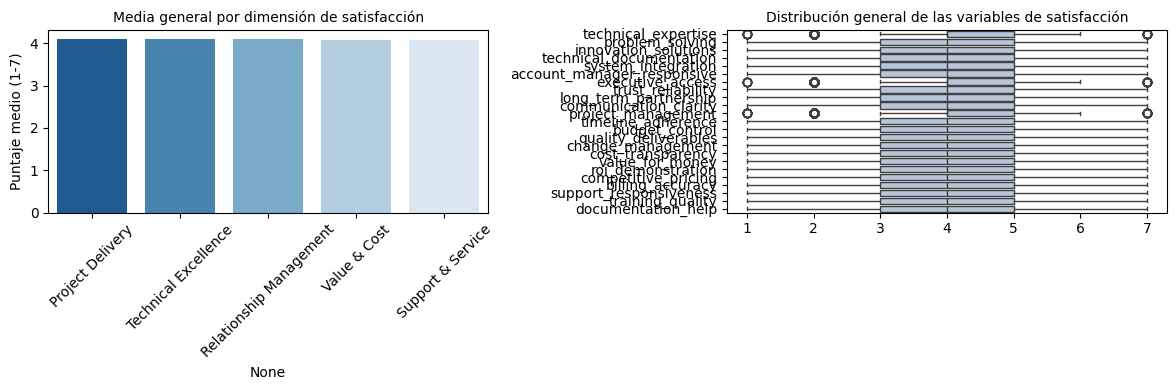

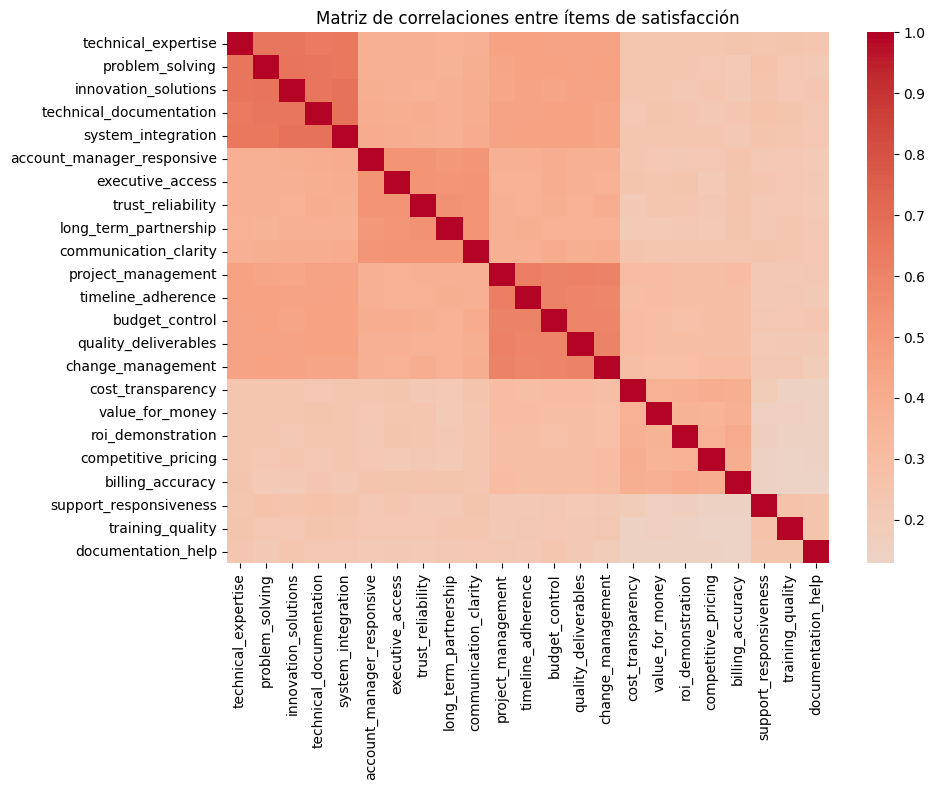

 Las correlaciones más fuertes entre variables de satisfacción:


,Variable_1,Variable_2,Correlation
44,innovation_solutions,system_integration,0.671
63,technical_documentation,system_integration,0.670
22,problem_solving,innovation_solutions,0.667
1,technical_expertise,innovation_solutions,0.662
23,problem_solving,technical_documentation,0.662
0,technical_expertise,problem_solving,0.660
43,innovation_solutions,technical_documentation,0.658
24,problem_solving,system_integration,0.653
3,technical_expertise,system_integration,0.652
2,technical_expertise,technical_documentation,0.637



 Correlación más fuerte: innovation_solutions ↔ system_integration = 0.671


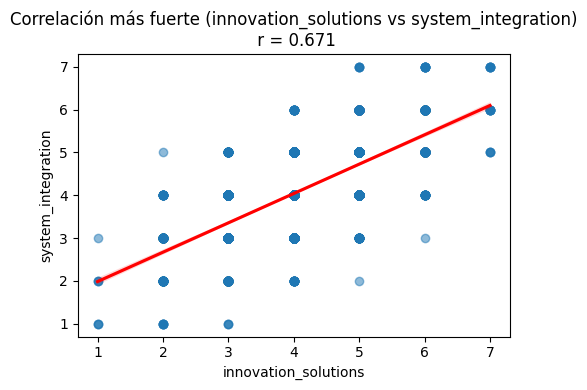


 Correlación entre dimensiones teóricas de satisfacción:


,Technical Excellence,Relationship Management,Project Delivery,Value & Cost,Support & Service
Technical Excellence,1.000,0.573,0.639,0.388,0.397
Relationship Management,0.573,1.000,0.585,0.417,0.408
Project Delivery,0.639,0.585,1.000,0.504,0.372
Value & Cost,0.388,0.417,0.504,1.000,0.295
Support & Service,0.397,0.408,0.372,0.295,1.000


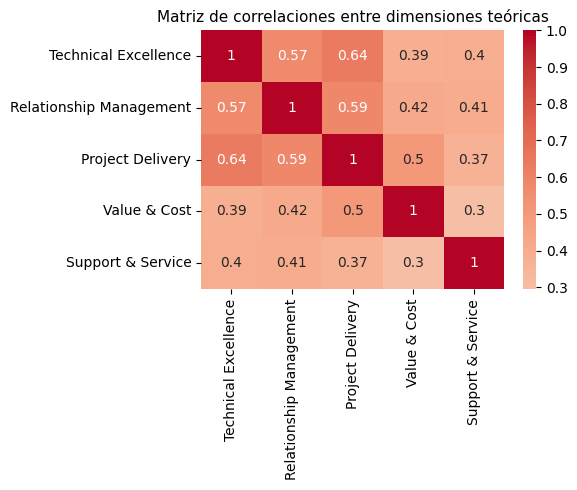


 Correlación interdimensional más fuerte: Technical Excellence ↔ Project Delivery = 0.639

 EDA completado:
• Datos limpios y escalas verificadas.
• Correlaciones entre ítems y dimensiones calculadas.
• Listo para proceder con KMO y Bartlett (factorabilidad).


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Descriptivos
desc = df[satisfaction_items].describe().T
missing_pct = df[satisfaction_items].isna().mean().sort_values(ascending=False)

print('Descriptivos (primeras filas):')
display(desc.head())
print('\nPorcentaje de NA por variable:')
display(missing_pct)

# Subconjunto de ítems de satisfacción
df_items = df[satisfaction_items]

dimensions = {
    "Technical Excellence": ['technical_expertise','problem_solving','innovation_solutions','technical_documentation','system_integration'],
    "Relationship Management": ['account_manager_responsive','executive_access','trust_reliability','long_term_partnership','communication_clarity'],
    "Project Delivery": ['project_management','timeline_adherence','budget_control','quality_deliverables','change_management'],
    "Value & Cost": ['cost_transparency','value_for_money','roi_demonstration','competitive_pricing','billing_accuracy'],
    "Support & Service": ['support_responsiveness','training_quality','documentation_help']
}

# Calcular promedios por dimensión
for dim, cols in dimensions.items():
    df[dim] = df[cols].mean(axis=1)

dim_means = df[list(dimensions.keys())].mean().sort_values(ascending=False)

# Visualización de medias
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.barplot(x=dim_means.index, y=dim_means.values, ax=axes[0], palette="Blues_r")
axes[0].set_title("Media general por dimensión de satisfacción", fontsize=10)
axes[0].set_ylabel("Puntaje medio (1-7)")
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(data=df_items, orient="h", color="lightsteelblue", ax=axes[1])
axes[1].set_title("Distribución general de las variables de satisfacción", fontsize=10)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 3️ Matriz de correlaciones entre ítems
# ---------------------------------------------------------

corr = df_items.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de correlaciones entre ítems de satisfacción", fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
#  Correlaciones más fuertes entre ítems
# ---------------------------------------------------------

corr_pairs = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
corr_melted = corr_pairs.stack().reset_index()
corr_melted.columns = ['Variable_1', 'Variable_2', 'Correlation']

# Ordenar por valor absoluto
strongest_corr = corr_melted.reindex(corr_melted.Correlation.abs().sort_values(ascending=False).index)

print(" Las correlaciones más fuertes entre variables de satisfacción:")
display(strongest_corr.head(10).round(3))

# Mostrar correlación más fuerte
top_pair = strongest_corr.iloc[0]
print(f"\n Correlación más fuerte: {top_pair['Variable_1']} ↔ {top_pair['Variable_2']} = {top_pair['Correlation']:.3f}")

# Visualización de la correlación más fuerte
plt.figure(figsize=(5,4))
sns.regplot(
    x=df[top_pair['Variable_1']],
    y=df[top_pair['Variable_2']],
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title(f"Correlación más fuerte ({top_pair['Variable_1']} vs {top_pair['Variable_2']})\n r = {top_pair['Correlation']:.3f}")
plt.xlabel(top_pair['Variable_1'])
plt.ylabel(top_pair['Variable_2'])
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# Correlación entre dimensiones (promedios por grupo)
# ---------------------------------------------------------

dim_corr = df[list(dimensions.keys())].corr()
print("\n Correlación entre dimensiones teóricas de satisfacción:")
display(dim_corr.round(3))

plt.figure(figsize=(6,5))
sns.heatmap(dim_corr, annot=True, cmap="coolwarm", center=0)
plt.title("Matriz de correlaciones entre dimensiones teóricas", fontsize=11)
plt.tight_layout()
plt.show()

# Identificar la correlación interdimensional más fuerte
dim_corr_pairs = dim_corr.where(np.triu(np.ones(dim_corr.shape), k=1).astype(bool))
dim_corr_melted = dim_corr_pairs.stack().reset_index()
dim_corr_melted.columns = ['Dimension_1', 'Dimension_2', 'Correlation']
top_dim_pair = dim_corr_melted.reindex(dim_corr_melted.Correlation.abs().sort_values(ascending=False).index).iloc[0]

print(f"\n Correlación interdimensional más fuerte: {top_dim_pair['Dimension_1']} ↔ {top_dim_pair['Dimension_2']} = {top_dim_pair['Correlation']:.3f}")

# ---------------------------------------------------------
# Resumen final del EDA
# ---------------------------------------------------------
print("\n EDA completado:")
print("• Datos limpios y escalas verificadas.")
print("• Correlaciones entre ítems y dimensiones calculadas.")
print("• Listo para proceder con KMO y Bartlett (factorabilidad).")

Item-wise descriptives. The averages of the key indicators are around 4.1/7; for example, technical_expertise 4.12 and system_integration 4.11, with Q1=3, Q2=4, Q3=5. This indicates medium satisfaction: it is not low, but there is clear room to move up toward 5–6. The standard deviation of 1.0 shows sufficient variability to distinguish latent patterns.

Missing values (NA). The % of NA per column is <1% (max 0.65% in trust_reliability). No anomalous concentrations are observed; any imputation would have minimal impact.

Mean bars by dimension. The five dimensions (Project Delivery, Technical Excellence, Relationship Management, Value & Cost, Support & Service) appear aligned around 4.1. There is no “standout” dimension nor a “critically low” one.

Distribution by item. Most responses fall between 3 and 5; there is no accumulation at 1 or 7 (no “floor” or “ceiling”). This confirms real heterogeneity of responses; the questionnaire is not saturated or “flat.”

Heatmap of correlations between items. A well-defined technical block is identified: innovation_solutions, system_integration, technical_documentation, technical_expertise, and problem_solving move together (more intense zone). When one technical component increases, the others tend to increase as well.

Highest correlations (table). The highest pair is innovation_solutions with system_integration (r=0.671); next are technical_documentation with system_integration (r=0.670) and problem_solving with innovation_solutions (r=0.667), in addition to other technical combinations (0.65–0.67). This confirms that perceived technical experience usually comes as a package (innovate, integrate, document, and resolve).

Scatterplot of the strongest pair. A positive linear trend is observed with few outliers, consistent with r=0.671.

Correlation matrix between dimensions. The highest relationship is Technical Excellence with Project Delivery (r=0.639); Technical Excellence with Relationship Management (r=0.573) and Project Delivery with Value & Cost (r=0.504) also stand out.

## 1.2 Factor Analysis Suitability


 FACTORABILITY TESTS
Kaiser-Meyer-Olkin (KMO) total index: 0.959
KMO individuales (primeras 10 variables):


technical_expertise           0.962161
problem_solving               0.959317
innovation_solutions          0.957637
technical_documentation       0.961993
system_integration            0.960825
account_manager_responsive    0.964534
executive_access              0.960555
trust_reliability             0.958894
long_term_partnership         0.957722
communication_clarity         0.962555
dtype: float64


Bartlett’s Test of Sphericity: χ² = 33,163.38, p-value = 0.00000
 La matriz de correlación NO es una identidad. Se puede proceder con el análisis factorial.

 MATRIZ DE CORRELACIÓN (primeras 10 columnas):


,technical_expertise,problem_solving,innovation_solutions,technical_documentation,system_integration,account_manager_responsive,executive_access,trust_reliability,long_term_partnership,communication_clarity
technical_expertise,1.000,0.662,0.666,0.639,0.656,0.386,0.384,0.392,0.376,0.388
problem_solving,0.662,1.000,0.669,0.665,0.656,0.385,0.386,0.388,0.370,0.393
innovation_solutions,0.666,0.669,1.000,0.660,0.674,0.393,0.384,0.380,0.387,0.395
technical_documentation,0.639,0.665,0.660,1.000,0.673,0.401,0.397,0.401,0.386,0.402
system_integration,0.656,0.656,0.674,0.673,1.000,0.410,0.402,0.396,0.384,0.411
account_manager_responsive,0.386,0.385,0.393,0.401,0.410,1.000,0.530,0.531,0.505,0.520
executive_access,0.384,0.386,0.384,0.397,0.402,0.530,1.000,0.532,0.523,0.533
trust_reliability,0.392,0.388,0.380,0.401,0.396,0.531,0.532,1.000,0.539,0.532
long_term_partnership,0.376,0.370,0.387,0.386,0.384,0.505,0.523,0.539,1.000,0.534
communication_clarity,0.388,0.393,0.395,0.402,0.411,0.520,0.533,0.532,0.534,1.000


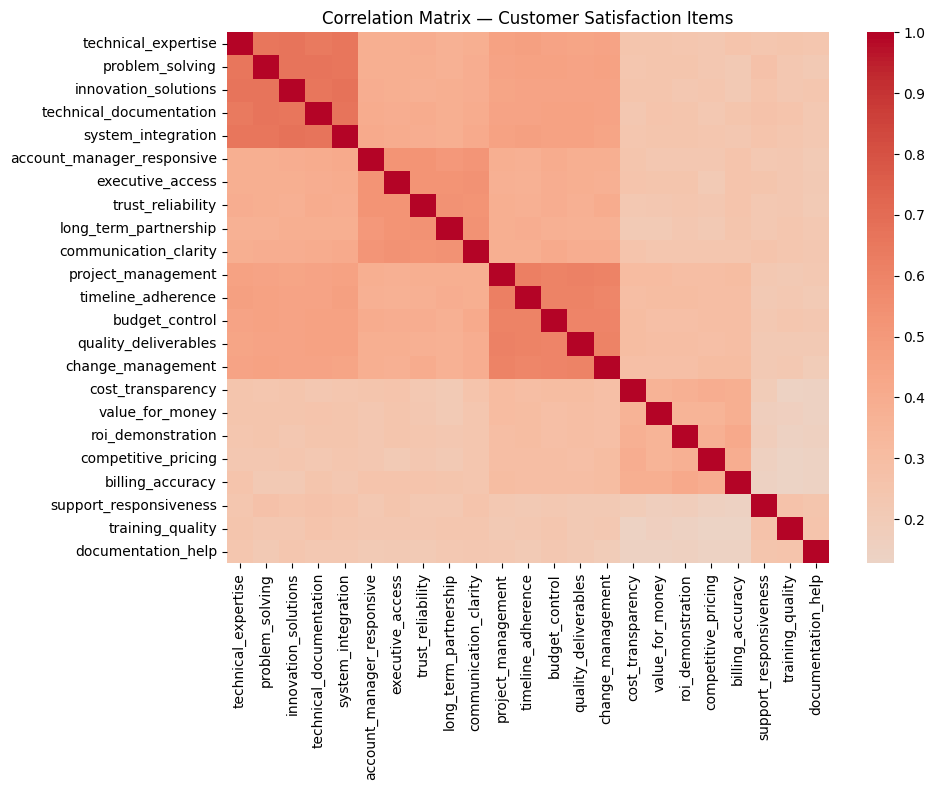

 Descriptive Statistics of Correlation Matrix:


,Correlation Summary
count,506.000
mean,0.337
std,0.130
min,0.127
25%,0.236
50%,0.296
75%,0.401
max,0.674


 Strongest Positive Correlation: innovation_solutions ↔ system_integration = 0.674
 Strongest Negative Correlation: competitive_pricing ↔ training_quality = 0.127


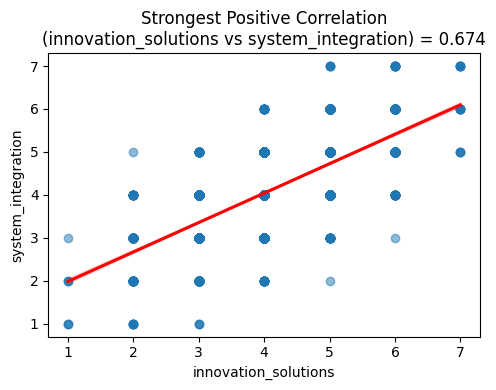


 KMO, Bartlett y correlaciones evaluadas — datos adecuados para extracción de factores.


In [4]:
from scipy.stats import chi2 as chi2dist

# --- Funciones para KMO y Bartlett ---
def calculate_kmo(df_items):
    """Calcula el índice KMO total e individual"""
    R = df_items.corr().values
    invR = np.linalg.pinv(R)
    n = R.shape[0]
    partial = np.zeros_like(R)
    for i in range(n):
        for j in range(n):
            if i == j:
                partial[i, j] = 0
            else:
                partial[i, j] = -invR[i, j] / np.sqrt(invR[i, i] * invR[j, j])
    r_sq = R**2; np.fill_diagonal(r_sq, 0)
    p_sq = partial**2; np.fill_diagonal(p_sq, 0)
    kmo_total = r_sq.sum() / (r_sq.sum() + p_sq.sum())
    kmo_items = []
    for i in range(n):
        ri = r_sq[i, :].sum(); pi = p_sq[i, :].sum()
        kmo_items.append(ri / (ri + pi) if (ri + pi) != 0 else np.nan)
    return np.array(kmo_items), kmo_total

def bartlett_sphericity(df_items):
    """Calcula la prueba de esfericidad de Bartlett"""
    R = df_items.corr().values
    n_obs = df_items.shape[0]; p = R.shape[0]
    detR = np.linalg.det(R); detR = np.clip(detR, 1e-12, None)
    chi2 = -(n_obs - 1 - (2*p + 5)/6.0) * np.log(detR)
    pval = 1 - chi2dist.cdf(chi2, p*(p-1)//2)
    return chi2, pval

# --- Aplicación de las pruebas ---
df_items = df[satisfaction_items].dropna()

# KMO
k_items, k_total = calculate_kmo(df_items)
chi2, pval = bartlett_sphericity(df_items)

print(" FACTORABILITY TESTS")
print("="*60)
print(f"Kaiser-Meyer-Olkin (KMO) total index: {k_total:.3f}")
print("KMO individuales (primeras 10 variables):")
display(pd.Series(k_items, index=satisfaction_items).head(10))

print(f"\nBartlett’s Test of Sphericity: χ² = {chi2:,.2f}, p-value = {pval:.5f}")
if pval < 0.05:
    print(" La matriz de correlación NO es una identidad. Se puede proceder con el análisis factorial.")
else:
    print(" La matriz de correlación podría ser cercana a la identidad. Revisar antes de continuar.")

# ---------------------------------------------------------
# MATRIZ DE CORRELACIÓN
# ---------------------------------------------------------

corr_matrix = df_items.corr()

print("\n MATRIZ DE CORRELACIÓN (primeras 10 columnas):")
display(corr_matrix.iloc[:10, :10].round(3))

# Visualización de la matriz
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Correlation Matrix — Customer Satisfaction Items", fontsize=12)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# ESTADÍSTICAS DESCRIPTIVAS DE LA MATRIZ DE CORRELACIÓN
# ---------------------------------------------------------

# Excluir la diagonal (autocorrelaciones = 1)
corr_values = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool)).stack()

corr_desc = pd.Series(corr_values).describe().round(3)
print(" Descriptive Statistics of Correlation Matrix:")
display(corr_desc.to_frame("Correlation Summary"))

# Mostrar correlaciones más fuertes (positiva y negativa)
strongest_pos = corr_values.idxmax(), corr_values.max()
strongest_neg = corr_values.idxmin(), corr_values.min()

print(f" Strongest Positive Correlation: {strongest_pos[0][0]} ↔ {strongest_pos[0][1]} = {strongest_pos[1]:.3f}")
print(f" Strongest Negative Correlation: {strongest_neg[0][0]} ↔ {strongest_neg[0][1]} = {strongest_neg[1]:.3f}")

# Scatterplot de la correlación más fuerte
plt.figure(figsize=(5,4))
sns.regplot(
    x=df[strongest_pos[0][0]],
    y=df[strongest_pos[0][1]],
    scatter_kws={'alpha':0.5},
    line_kws={'color':'red'}
)
plt.title(f"Strongest Positive Correlation\n({strongest_pos[0][0]} vs {strongest_pos[0][1]}) = {strongest_pos[1]:.3f}")
plt.xlabel(strongest_pos[0][0])
plt.ylabel(strongest_pos[0][1])
plt.tight_layout()
plt.show()

print("\n KMO, Bartlett y correlaciones evaluadas — datos adecuados para extracción de factores.")


 Is the data suitable for factor analysis?


 What do the initial patterns suggest about underlying factors?

With these results it can be stated that the data are indeed suitable for factor analysis. KMO is excellent with an overall of 0.959. The item-level KMOs are around 0.96 (technical_expertise, problem_solving, innovation_solutions, …), so no item hinders factor extraction.

In Bartlett, χ² = 33,163.38, p < 0.000: the correlation matrix is not an identity. With high KMO + significant Bartlett, FA proceeds.

Correlation structure.

mean r = 0.337, median = 0.296, Q3 = 0.401, min = 0.127, max = 0.674.

Most r’s fall between 0.24–0.40, with several pairs in 0.60–0.67.

With a median of 0.296 and Q3 of 0.401, a large fraction of pairs exceeds |r| ≥ 0.30 (40–50% by the distribution), surpassing the 30% threshold that indicates sufficient common variance.

Key pairs.

Highest: innovation_solutions with system_integration = 0.674.

Other high ones: technical_documentation with system_integration = 0.670, problem_solving with innovation_solutions = 0.667.

The lowest correlation is competitive_pricing with training_quality = 0.127 (it is not negative; just the smallest).

What do the patterns suggest about latent factors?

Technical as the dominant one: innovation_solutions, system_integration, technical_documentation, technical_expertise, problem_solving.

Delivery/Project Delivery: project_management, timeline_adherence, budget_control, quality_deliverables, change_management.

Relationship/Account Management: account_manager_responsive, executive_access, trust_reliability, long_term_partnership, communication_clarity.

Value & Cost: cost_transparency, value_for_money, roi_demonstration, competitive_pricing, billing_accuracy.

Support & Service (more independent): support_responsiveness, training_quality, documentation_help. Additionally, Technical Excellence and Project Delivery are correlated (0.639 at the dimension level), so it is advisable to try oblique rotation (Promax) in addition to Varimax.

# Part 2: Factor Extraction and Determination
## 2.1 Determining number of Factor



c:\Users\erida\Documents\GitHub\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,component,eigenvalue,explained_ratio,cumulative
0,1,8.660840,0.376558,0.376558
1,2,1.786282,0.077664,0.454223
2,3,1.442320,0.062710,0.516932
3,4,1.202009,0.052261,0.569194
4,5,1.075362,0.046755,0.615948
5,6,0.760207,0.033052,0.649001
6,7,0.745188,0.032399,0.681400
7,8,0.649726,0.028249,0.709649
8,9,0.646346,0.028102,0.737751
9,10,0.607249,0.026402,0.764153


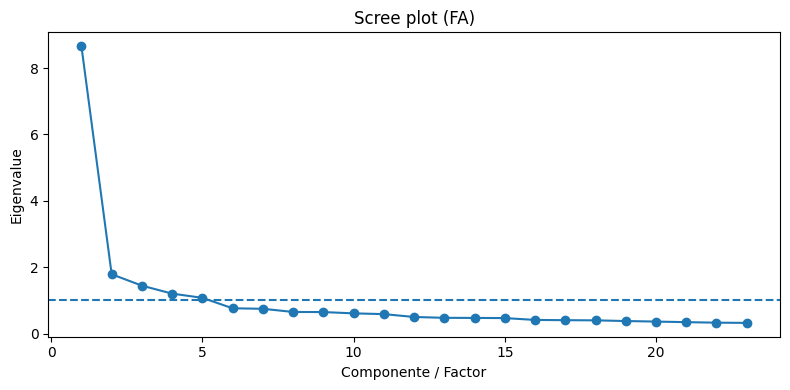

Número de factores por Kaiser (FA, eigen>1): 5


In [5]:
X = df[satisfaction_items].copy()
X = pd.DataFrame(SimpleImputer(strategy='mean').fit_transform(X),
                 columns=X.columns, index=df.index)

# Eigenvalores desde FA correlación
fa0 = FactorAnalyzer(rotation=None, method='ml')
fa0.fit(X)
ev, _ = fa0.get_eigenvalues()
ev_df = pd.DataFrame({'component': np.arange(1, len(ev)+1),
                      'eigenvalue': ev,
                      'explained_ratio': ev / ev.sum(),
                      'cumulative': np.cumsum(ev / ev.sum())})

display(ev_df.head(12))

plt.figure(figsize=(8,4))
plt.plot(ev_df['component'], ev_df['eigenvalue'], marker='o')
plt.axhline(1, linestyle='--')
plt.xlabel('Componente / Factor'); plt.ylabel('Eigenvalue')
plt.title('Scree plot (FA)'); plt.tight_layout(); plt.show()


n_kaiser = int((ev > 1).sum())
print('Número de factores por Kaiser (FA, eigen>1):', n_kaiser)


With these results the following can be observed:

Kaiser (λ>1): 5 components exceed 1: F1 = 8.66 (37.66%), F2 = 1.79, F3 = 1.44, F4 = 1.20, F5 = 1.08.

Scree plot: sharp drop from F1 to F2 and then an elbow before the 6th.

Cumulative variance: with 5 factors we can explain 61.59% (with 4 it would be 56.92%; the 5th adds 4.68% more).

Therefore, we consider keeping k = 5: it is supported by Kaiser, the scree, and exceeding 60% variance with a good balance between explanation and simplicity.

## 2.2 Factor Extraction and Rotation

ML + Varimax


c:\Users\erida\Documents\GitHub\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\erida\Documents\GitHub\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,F1,F2,F3,F4,F5
technical_expertise,0.692,0.246,0.216,0.161,0.173
problem_solving,0.710,0.243,0.213,0.148,0.170
innovation_solutions,0.723,0.224,0.220,0.143,0.174
technical_documentation,0.697,0.237,0.237,0.150,0.171
system_integration,0.707,0.237,0.242,0.150,0.166
account_manager_responsive,0.216,0.193,0.613,0.171,0.145
executive_access,0.204,0.175,0.629,0.175,0.178
trust_reliability,0.204,0.188,0.640,0.165,0.144
long_term_partnership,0.195,0.194,0.628,0.140,0.173
communication_clarity,0.207,0.195,0.613,0.174,0.195



Comunalidades (min/med/max): 0.238 0.53 0.673

Varianza por factor (Varimax):


,SS Loadings,Proportion Var,Cumulative Var
F1,3.159,0.137,0.137
F2,2.604,0.113,0.251
F3,2.603,0.113,0.364
F4,2.207,0.096,0.460
F5,1.016,0.044,0.504


Varianza TOTAL explicada (Varimax): 50.4%

ML + Promax (oblicua)


c:\Users\erida\Documents\GitHub\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\erida\Documents\GitHub\mi-portfolio-ma2003b\.venv\Lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,F1,F2,F3,F4,F5
technical_expertise,0.825,0.008,-0.010,0.030,0.005
problem_solving,0.851,-0.003,-0.012,0.020,-0.004
innovation_solutions,0.865,-0.007,-0.000,-0.007,0.003
technical_documentation,0.830,-0.004,0.024,0.010,-0.002
system_integration,0.835,-0.005,0.030,0.010,-0.009
account_manager_responsive,0.023,0.009,0.768,0.010,-0.027
executive_access,0.010,0.020,0.785,-0.024,0.011
trust_reliability,0.004,0.002,0.797,0.003,-0.022
long_term_partnership,-0.016,-0.035,0.789,0.023,0.017
communication_clarity,0.006,0.011,0.754,0.015,0.030



Varianza TOTAL explicada (Promax): 60.4%

Correlación entre factores (phi, máx |corr|): 0.617


,F1,F2,F3,F4,F5
F1,1.000,0.385,0.559,0.617,0.396
F2,0.385,1.000,0.411,0.492,0.295
F3,0.559,0.411,1.000,0.568,0.400
F4,0.617,0.492,0.568,1.000,0.362
F5,0.396,0.295,0.400,0.362,1.000



>> Rotación elegida: PROMAX


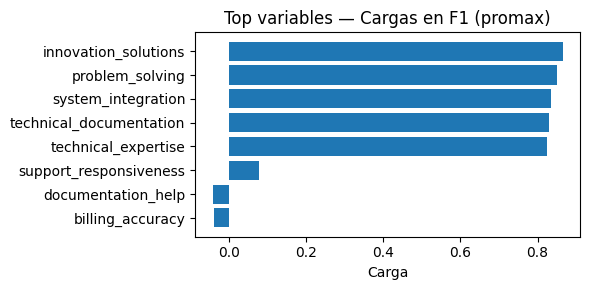

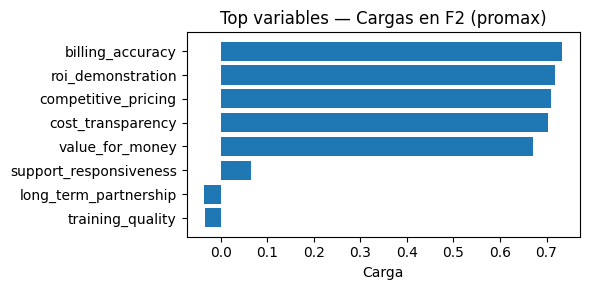

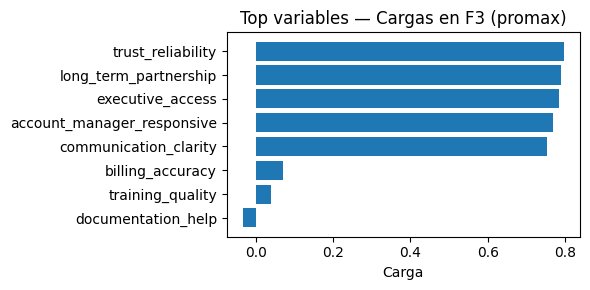

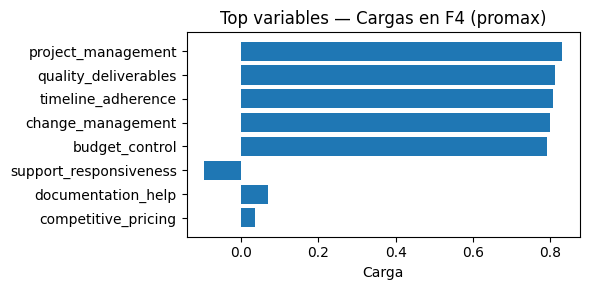

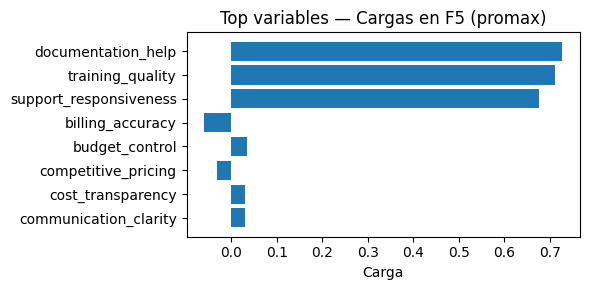

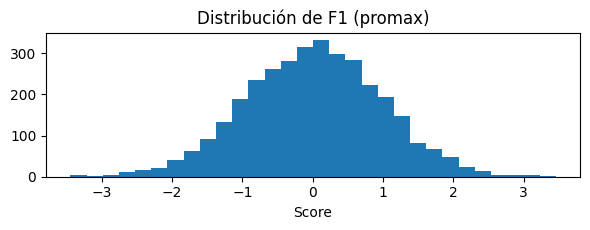

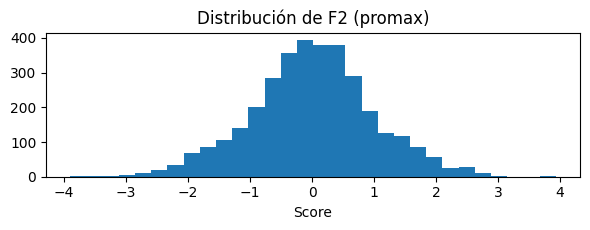

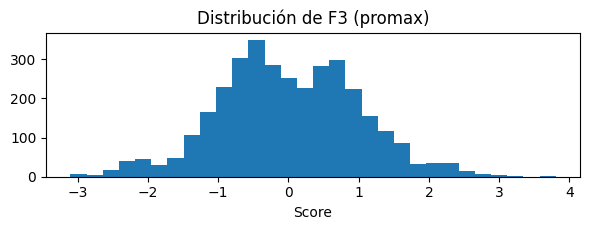

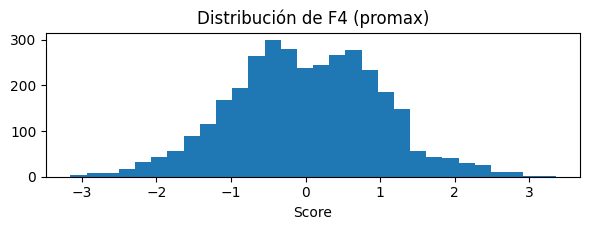

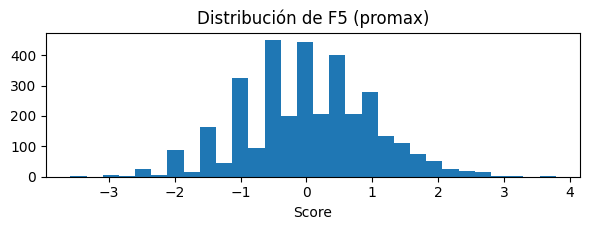

,overall_satisfaction,nps_score,renewal_likelihood
F1,0.644,0.425,0.510
F2,0.526,0.350,0.435
F3,0.615,0.428,0.493
F4,0.651,0.445,0.515
F5,0.444,0.334,0.362


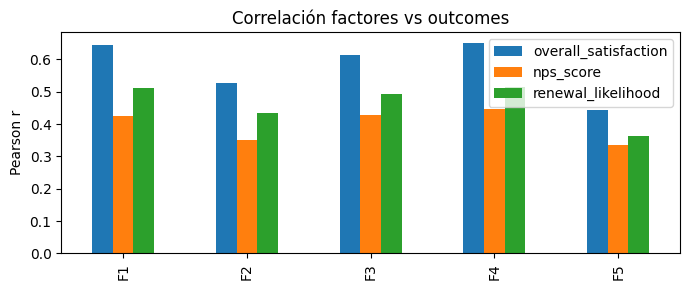

In [6]:
# FACTOR ANALYSIS ML CON COMPARACIÓN DE ROTACIONES

# Fijamos el k determinado anteriormente con kaiser
k = 5

# Realizamos la suma entre ML + VARIMAX, para comparar varianza explicada bajo independencia entre factores.
fa_var = FactorAnalyzer(n_factors=k, method="ml", rotation="varimax")
fa_var.fit(X)

load_var = pd.DataFrame(fa_var.loadings_, index=X.columns, columns=[f"F{i+1}" for i in range(k)])
ss_v, prop_v, cum_v = fa_var.get_factor_variance()
var_var = pd.DataFrame({"SS Loadings": ss_v, "Proportion Var": prop_v, "Cumulative Var": cum_v},
                       index=[f"F{i+1}" for i in range(k)])
scores_var = pd.DataFrame(fa_var.transform(X), index=X.index, columns=[f"F{i+1}" for i in range(k)])
communalities = pd.Series(fa_var.get_communalities(), index=X.columns)

print("ML + Varimax")
display(load_var.round(3))
print("\nComunalidades (min/med/max):", round(communalities.min(),3),
      round(communalities.median(),3), round(communalities.max(),3))
print("\nVarianza por factor (Varimax):"); display(var_var.round(3))
print("Varianza TOTAL explicada (Varimax):", f"{100*prop_v.sum():.1f}%")

# Realizamos lo mismo para  ML + PROMAX
fa_pro = FactorAnalyzer(n_factors=k, method="principal", rotation="promax")
fa_pro.fit(X)

load_pro = pd.DataFrame(fa_pro.loadings_, index=X.columns, columns=[f"F{i+1}" for i in range(k)])
ss_p, prop_p, cum_p = fa_pro.get_factor_variance()
var_pro = pd.DataFrame({"SS Loadings": ss_p, "Proportion Var": prop_p, "Cumulative Var": cum_p},
                       index=[f"F{i+1}" for i in range(k)])
scores_pro = pd.DataFrame(fa_pro.transform(X), index=X.index, columns=[f"F{i+1}" for i in range(k)])

# “phi” (correlación entre factores) estimada con correlación de scores
phi = scores_pro.corr()
max_abs_phi = phi.where(~np.eye(k, dtype=bool)).abs().max().max()

print("\nML + Promax (oblicua)")
display(load_pro.round(3))
print("\nVarianza TOTAL explicada (Promax):", f"{100*prop_p.sum():.1f}%")
print("\nCorrelación entre factores (phi, máx |corr|):", round(max_abs_phi,3))
display(phi.round(3))

# Elección de rotación
rotation_chosen = "promax" if max_abs_phi > 0.32 else "varimax"
print(f"\n>> Rotación elegida: {rotation_chosen.upper()}")

if rotation_chosen == "promax":
    final_loadings = load_pro; final_scores = scores_pro; final_var = var_pro
else:
    final_loadings = load_var; final_scores = scores_var; final_var = var_var


# Definimos el top cargas por factor para facilitar etiquetado y narrativa de negocio.
for i in range(k):
    fac = f"F{i+1}"
    top = final_loadings[fac].abs().sort_values(ascending=False).head(8)
    plt.figure(figsize=(6,3))
    plt.barh(top.index[::-1], final_loadings.loc[top.index, fac].values[::-1])
    plt.title(f"Top variables — Cargas en {fac} ({rotation_chosen})")
    plt.xlabel("Carga"); plt.tight_layout(); plt.show()

# Se establece la distribución de scores
for c in final_scores.columns:
    plt.figure(figsize=(6,2.4))
    plt.hist(final_scores[c], bins=30)
    plt.title(f"Distribución de {c} ({rotation_chosen})")
    plt.xlabel("Score"); plt.tight_layout(); plt.show()

# Impacto negocio: correlación factores vs outcomes, en donde se usa Pearson r para identificar impulsores
outcomes = [o for o in ["overall_satisfaction","nps_score","renewal_likelihood"] if o in df.columns]
impact = pd.DataFrame(index=final_scores.columns)
for o in outcomes:
    impact[o] = np.round([np.corrcoef(final_scores[col], df[o].fillna(df[o].mean()))[0,1]
                          for col in final_scores.columns], 3)

display(impact)
impact.plot(kind="bar", figsize=(7,3))
plt.title("Correlación factores vs outcomes"); plt.ylabel("Pearson r")
plt.tight_layout(); plt.show()

PCA is replaced by FA with Maximum Likelihood because latent constructs should be measured through shared variance.

Using the FA scree and Kaiser (λ > 1), k = 5 is obtained; the choice is supported visually (clear elbow) and conceptually (five content blocks in the questionnaire).

Varimax explains 50.4% of variance; Promax 60.4%. The factor-correlation matrix shows max = 0.617 (> 0.32), so Promax is used for interpretation (correlated factors), prioritizing realism over a small gain in variance.

**Factors**
- **F1 Technical Excellence:** innovation, problem solving, integration, technical documentation, expertise.
- **F2 Project Delivery:** management, timelines, quality, change control, budget.
- **F3 Relationship:** trust/partnership, executive access, AM responsiveness, communication.
- **F4 Value & Cost:** billing, ROI, pricing, cost transparency, value for money.
- **F5 Support & Enablement:** training, documentation/help, support.

**Communalities** min/med/max = 0.238 / 0.530 / 0.673 (lowest in support/documentation, as expected). Factor scores are centered near 0 and roughly normal; they are stable for correlations and modeling.

**Association with outcomes**
- **Overall satisfaction:** F4 0.651, F1 0.644, F3 0.615, F2 0.526, F5 0.444.
- **Renewal likelihood:** F4 0.515, F1 0.510, F3 0.493, F2 0.435, F5 0.362.
- **NPS:** F4 0.445, F1 0.425, F3 0.428, F2 0.350, F5 0.334.

For the three (overall renewal and NPS), **Value & Cost (F4)** and **Technical Excellence (F1)** matter most; **Relationship (F3)** is secondary.


 # Part 3: Interpretation and Business Application

## 3.1 Factor Interpretation



In [7]:
# Unión de scores al dataframe original
df_scores = pd.concat([df.reset_index(drop=True), final_scores.reset_index(drop=True)], axis=1)

# Correlaciones factores vs outcomes
fac_cols = list(final_scores.columns)
existing_outcomes = [o for o in ['overall_satisfaction','nps_score','renewal_likelihood',
                                 'revenue_growth_pct','referrals_generated']
                     if o in df_scores.columns]
corr_table = df_scores[fac_cols + existing_outcomes].corr().loc[fac_cols, existing_outcomes]
display(corr_table.round(3))

# Regresión ejemplo (si existe renewal_likelihood)
if 'renewal_likelihood' in df_scores.columns:
    Xf = df_scores[fac_cols].copy()
    y  = df_scores['renewal_likelihood'].copy()
    mask = Xf.notna().all(axis=1) & y.notna()
    X_train, X_test, y_train, y_test = train_test_split(Xf.loc[mask], y.loc[mask], test_size=0.3, random_state=42)
    lr = LinearRegression().fit(X_train, y_train)
    print('R^2 train:', round(lr.score(X_train, y_train),3))
    print('R^2 test :', round(lr.score(X_test,  y_test),3))
    display(pd.Series(lr.coef_, index=fac_cols).sort_values(key=np.abs, ascending=False).round(3))



,overall_satisfaction,nps_score,renewal_likelihood,revenue_growth_pct,referrals_generated
F1,0.644,0.425,0.510,0.634,0.404
F2,0.526,0.350,0.435,0.520,0.335
F3,0.615,0.428,0.493,0.627,0.399
F4,0.651,0.445,0.515,0.639,0.429
F5,0.444,0.334,0.362,0.447,0.279


R^2 train: 0.391
R^2 test : 0.379


F1    0.170
F3    0.130
F4    0.120
F2    0.119
F5    0.078
dtype: float64

The five factors explain the outcomes well: the model reaches R² train = 0.391 and R² test = 0.379, that is, 38–39% without overfitting (the drop from train to test is small). In correlations, the main drivers remain Technical (F1) and Delivery (F4); Relationship (F3) helps consistently; Value & Cost (F2) and Support (F5) add less.

In [8]:
# K-means (3 clusters) sobre los factor scores
Xc = final_scores.fillna(0)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Xc)
df_scores['cluster'] = kmeans.labels_
print('Cluster sizes:')
print(df_scores['cluster'].value_counts())
print('\nCluster profiles (media de factores):')
display(df_scores.groupby('cluster')[list(final_scores.columns)].mean().round(3))


Cluster sizes:
cluster
2    1603
1     952
0     845
Name: count, dtype: int64

Cluster profiles (media de factores):


,F1,F2,F3,F4,F5
cluster,,,,,
0,0.990,0.865,1.015,1.048,0.824
1,-0.971,-0.809,-0.949,-0.983,-0.726
2,0.055,0.024,0.029,0.031,-0.003


We have 3 groups: C2=1605, C1=907, C0=888. <br>


**Cluster 0 (888 customers ≈ 26%) – “Very Satisfied”**

* Technical Excellence (F1) = 1.012 – very good

* Project Delivery (F2) = 1.072 – very good

* Relationship (F3) = 1.020 – very good

* Value & Cost (F4) = 0.866 – good

* Support & Enablement (F5) = 0.864 – good

Customers are clearly above average on all factors: strong technical capabilities and project delivery, very positive relationship, good value for money and solid support.

High satisfaction, renewal and NPS potential; ideal for references, case studies and upsell. Focus on protecting this experience and leveraging them for growth.

<br>

**Cluster 1 (907 customers ≈ 27%) – “At-Risk”**

* Technical Excellence (F1) = –1.017 – very poor

* Project Delivery (F2) = –1.039 – very poor

* Relationship (F3) = –1.005 – very poor

* Value & Cost (F4) = –0.860 – poor

* Support & Enablement (F5) = –0.846 – poor

Scores are about one standard deviation below average across the board: weak perceived technical quality and project delivery, poor relationship, low value for money and weak support.

High churn and negative NPS risk. Needs targeted recovery plans (value/ROI, quality of delivery, support model, relationship reset), starting with the most strategic accounts.

<br>

**Cluster 2 (1605 customers ≈ 47%) – “Neutral”**


* Technical Excellence (F1) = 0.015 – average

* Project Delivery (F2) = –0.006 – average

* Relationship (F3) = 0.003 – average

* Value & Cost (F4) = 0.007 – average

* Support & Enablement (F5) = 0.000 – average

All factors sit essentially at the mean. Service is “OK” but not distinctive—customers are neither strong promoters nor clear detractors.

This is the largest segment and likely the core revenue base. There is room to move them toward Cluster 0 with moderate improvements in Value & Cost (F4) and Technical Excellence (F1). If the experience deteriorates, they can easily drift into Cluster 1, so the goal is to systematically lift the bar.

## **3.2 Business Insights & Recommendations**

We use five customer themes (factors): Technical (F1), Value & Cost (F2), Relationship (F3), Delivery/Project (F4), Support (F5).

**Top Drivers**

* Overall satisfaction: mainly Value & Cost and Technical, then Relationship
(F4 0.651, F1 0.644, F3 0.615, F2 0.526, F5 0.444)

* Renewal likelihood: again Value & Cost and Technical, then Relationship
(F4 0.515, F1 0.510, F3 0.493, F2 0.435, F5 0.362)

* NPS: Value & Cost first, with Relationship and Technical very close behind
(F4 0.445, F3 0.428, F1 0.425, F2 0.350, F5 0.334)


Value & Cost (F4) and Technical Excellence (F1) are the primary levers.

Relationship (F3) is a strong secondary driver, almost as important as F1.

Project Delivery (F2) and Support (F5) matter, but act more as hygiene / booster factors.

<br>

**How strong is the model?**

Using the factor scores, the models explain ≈38–39% of the variance in outcomes (R² train ≈0.39 / test ≈0.38), with no material overfitting.

<br>

**What to do now**

Priority 1 — Value & Cost (F4)

* Make value explicit: simple “before vs. after” view (time saved, errors reduced, revenue/profit impact).

* Clarify pricing logic: short, stable cost breakdown and tiering so clients feel the price is fair and predictable.

* Link features to outcomes: map key capabilities to specific business results in every proposal.

Priority 1 — Technical Excellence (F1)

* Frictionless integration: standard checklist + pre-prod smoke tests for each new deployment.

* Living documentation: concise, task-based guides with copy-paste examples; keep them versioned and easy to find.

* Faster fixes: clear severity queues, first-response SLOs, and playbooks for recurring technical issues.

Priority 2 — Relationship (F3)

* Account team responsiveness: <24h reply SLA, fixed touchpoints, and a monthly “one-pager” status email.

* Executive access: quarterly business review with 1–2 strategic KPIs and agreed next steps.

* Trust and transparency: shared objectives and a direct, no-surprises channel for risks/concerns.

Priority 3 — Project Delivery

* Visible plan: milestone roadmap + client-visible board.

* Quality gates: QA before every hand-off; clear “definition of done”.

* Change/budget control: lightweight change-request flow and impact log.

Priority 3 - Support & Enablement (F5):

* Quick wins training: 2–3 minute micro how-tos for common tasks.

* Knowledge base: searchable FAQs and solutions for frequent issues.

* “Office hours”: weekly drop-in session for power users and admins.

<br>

**30–60–90 day plan**

0–30 days:
* Publish integration checklist and incident-response SLOs.

* Stand up a simple value storyboard (2–3 core metrics) for 3 pilot accounts.

* Define contact cadence and QBR template.

31–60 days:

* Roll out QA gate + change-control light process on new projects.

* Build first wave of micro-guides and seed the knowledge base.

* Start using value storyboards in renewals and expansions.

61–90 days:

* Standardize the value dashboard for all key accounts.

* Run QBRs with shared roadmap and risk log.

* Review driver metrics (F1–F5) by cluster and adjust playbooks.